# Preliminaries

## Population and Sample

Review of high-school statistics: sample statistic uses $n-1$ as the denominator for the degree of freedom.

In [27]:
import numpy as np
import pandas as pd
from scipy.stats import norm

In [2]:
# say we have the following data
population = np.random.randint(low=10, high=70, size=10)
population

array([13, 23, 52, 68, 55, 24, 27, 54, 64, 59])

In [3]:
# to calculate the population mean
population.mean()

43.9

In [4]:
# to calculate population variance, we use ddof=0
# note that in pandas, the default is ddof=1 (i.e. sample variance)
# whereas in numpy, the default is ddof=0
population.var(ddof=0)

357.69000000000005

## Empirical Distribution of Sample Mean/Variance

For an unbiased estimator, the average of sample statistics will tend to converge to the population value.

In [6]:
population = pd.Series(population)
sample_length = 500
sample_variance_collection=[population.sample(10, replace=True).var(ddof=1) for i in range(sample_length)]
np.mean(sample_variance_collection)

353.20348888888884

It can also be shown, that if the population is normally distributed with mean $\mu$ and variance $\sigma^2$, the sample mean is also normal with mean $\mu$ and variance $\sigma^2/n$. Even if the population is not normally distributed, the **central limit theorem** guarantees that the sample mean is approximately normal with mean $\mu$ and variance $\sigma^2/n$, if the sample size is large enough.

In [10]:
# collect sample means from multiple experiments
meanlist = []
varlist = []
for t in range(10000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30))
    meanlist.append(sample[0].mean())
    varlist.append(sample[0].var(ddof=1))

collection = pd.DataFrame()
collection['meanlist'] = meanlist
collection['varlist'] = varlist

<Axes: >

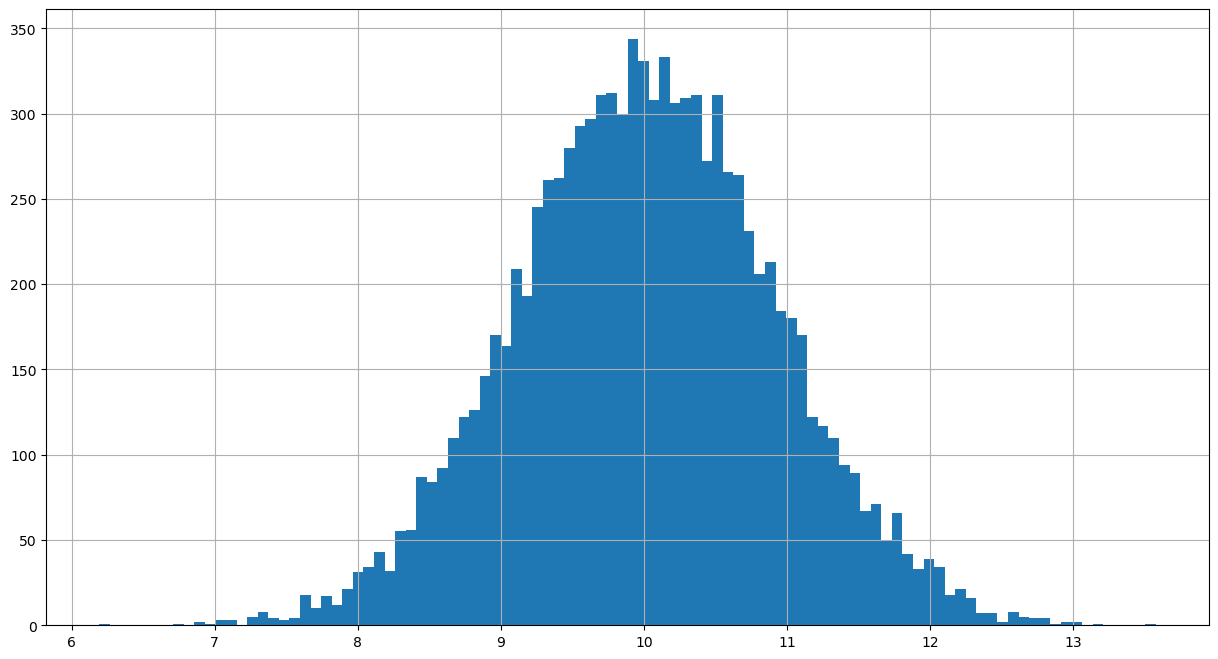

In [12]:
# plot the sample means: note that it's normally distributed
collection['meanlist'].hist(bins=100,figsize=(15,8))

<Axes: >

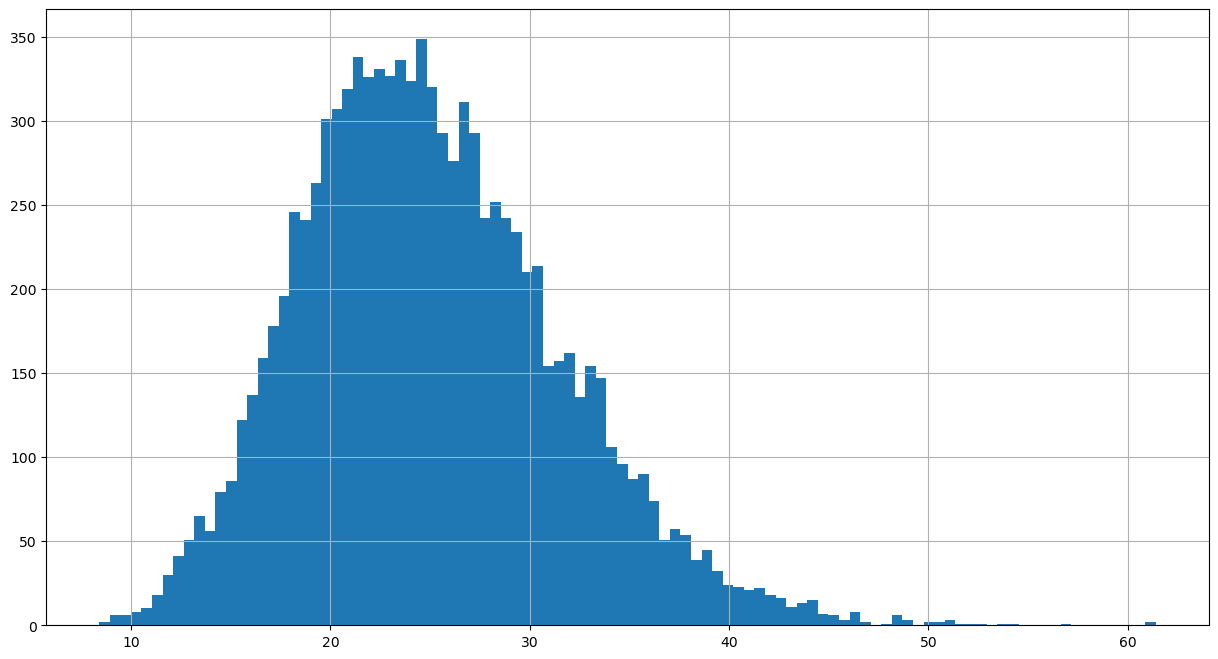

In [14]:
# plot the sample means: note that it's right skewed
collection['varlist'].hist(bins=100,figsize=(15,8))

## Sampling from an arbitrary distribution

Let's put the central limit theorem to a test via simulation.

array([[<Axes: title={'center': 'meanlist'}>]], dtype=object)

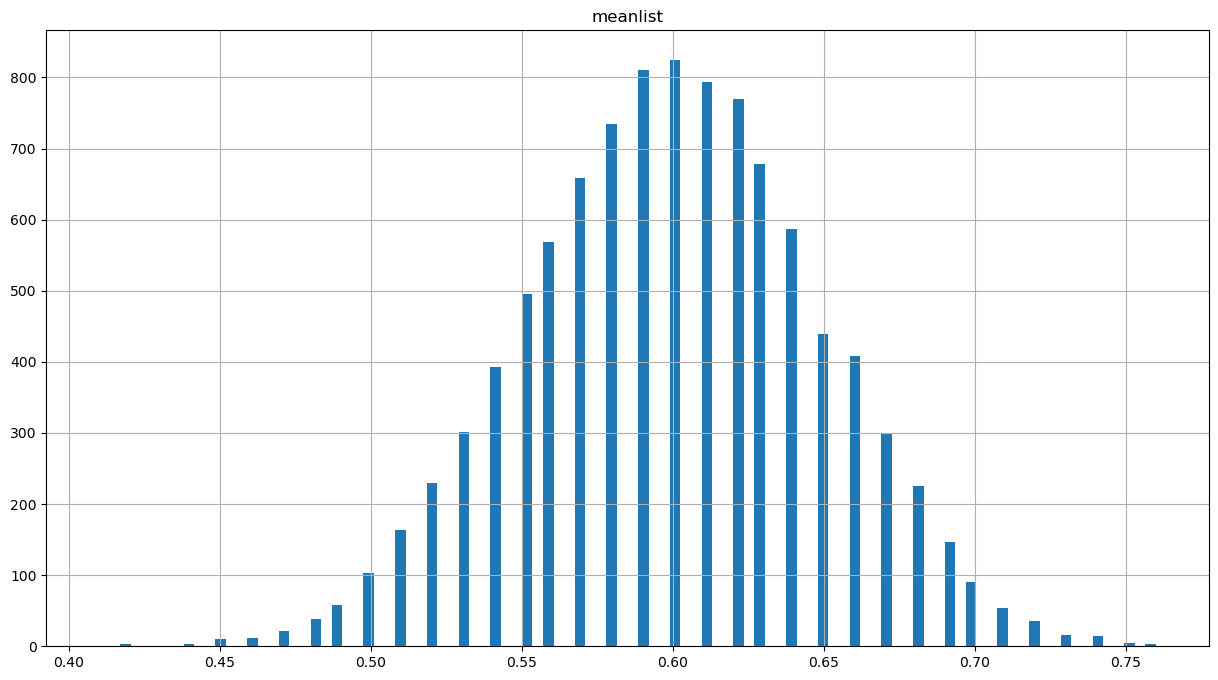

In [19]:
sample_size = 100 # small sample size
samplemeanlist = []
apop =  pd.DataFrame([1, 0, 1, 0, 1])
for t in range(10000):
    sample = apop[0].sample(sample_size, replace=True)
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist
acollec.hist(bins=100, figsize=(15,8))

In [22]:
acollec.meanlist.value_counts()

meanlist
0.60    825
0.59    811
0.61    794
0.62    770
0.58    735
0.63    678
0.57    659
0.64    587
0.56    569
0.55    495
0.65    439
0.66    408
0.54    393
0.53    302
0.67    300
0.52    230
0.68    225
0.51    164
0.69    146
0.50    103
0.70     91
0.49     58
0.71     54
0.48     38
0.72     36
0.47     22
0.73     16
0.74     15
0.46     12
0.45     10
0.75      4
0.42      3
0.76      3
0.44      3
0.41      1
0.43      1
Name: count, dtype: int64

array([[<Axes: title={'center': 'meanlist'}>]], dtype=object)

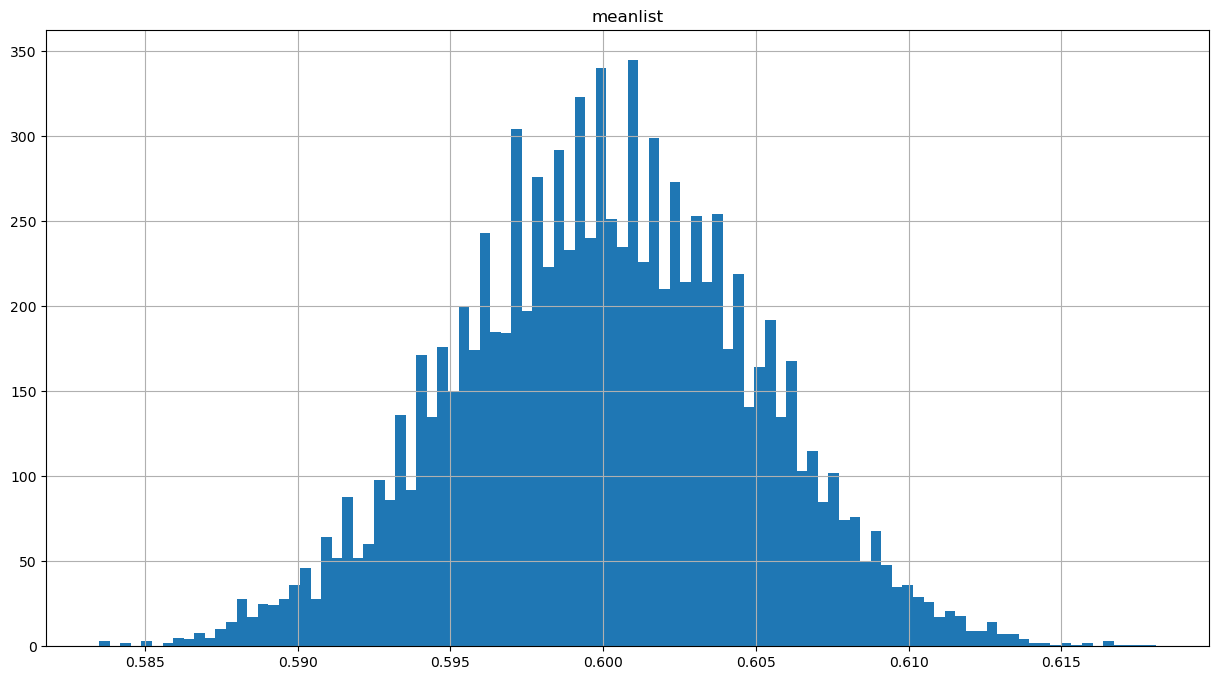

In [23]:
sample_size = 10000 # larger sample size
samplemeanlist = []
apop =  pd.DataFrame([1, 0, 1, 0, 1])
for t in range(10000):
    sample = apop[0].sample(sample_size, replace=True)
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist
acollec.hist(bins=100, figsize=(15,8))

# Confidence Interval

When we calculate the mean of daily stock returns from a dataset, we are getting the sample mean. We now know that the population mean should be close to this sample mean if the sample size is large enough. In order to get an estimate of how far the population mean is, we use confidence interval.

![](https://analystprep.com/cfa-level-1-exam/wp-content/uploads/2019/10/page-159.jpg)

In [25]:
ms = pd.read_csv("data/microsoft.csv")
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [28]:
# estimate the average stock return of microsoft with 90% confidence interval
ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])
sample_size = ms['logReturn'].shape[0]
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)

z_left = norm.ppf(0.05) # LEFT QUANTILE
z_right = norm.ppf(0.95) # RIGHT QUANTILE

# upper and lower bound
interval_left = sample_mean + sample_std/sample_size**0.5 * z_left
interval_right = sample_mean + sample_std/sample_size**0.5 * z_right

print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (-1.560325389937862e-05, 0.001656066226145423)


In [29]:
ap = pd.read_csv('data/apple.csv')
ap.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800
1,2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200
2,2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700
3,2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800
4,2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700


In [31]:
# estimate the average stock return of apple with 90% confidence interval
ap['logReturn'] = np.log(ap['Close'].shift(-1)) - np.log(ap['Close'])
sample_size = ap['logReturn'].shape[0]
sample_mean = ap['logReturn'].mean()
sample_std = ap['logReturn'].std(ddof=1)

z_left = norm.ppf(0.05) # LEFT QUANTILE
z_right = norm.ppf(0.95) # RIGHT QUANTILE

# upper and lower bound
interval_left = sample_mean + sample_std/sample_size**0.5 * z_left
interval_right = sample_mean + sample_std/sample_size**0.5 * z_right

print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (0.000355889185099998, 0.0015950463332001777)


Note that if the 90% confidence interval is to the right of the zero line, that means it's likely that the stock will yield positive returns.